<a href="https://colab.research.google.com/github/Favisoki/hamoye-ds/blob/master/Hamoye_Stage_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
d_frame=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')

In [4]:
 
#rename columns
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area', 'X3':  'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height','X6': 'Orientation', 'X7': 'Glazing_Area', 'X8': 'Glazing_Area_Distribution', 'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}
 
d_frame=d_frame.rename(columns=column_names)

In [5]:
#select a sample of the dataset
linear_reg_df = d_frame[['Relative_Compactness','Cooling_Load']].sample(15, random_state=1)

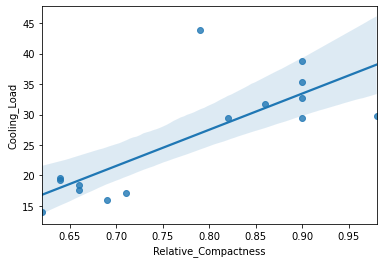

In [6]:
#regression plot
sns.regplot(x="Relative_Compactness", y="Cooling_Load", data=linear_reg_df)

 MODEL TESTING

In [7]:
#Firstly the dataset is normalised to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
 
scaler = MinMaxScaler()
 
normalised_df = pd.DataFrame(scaler.fit_transform(d_frame), columns=d_frame.columns)
features_df = normalised_df.drop(columns=['Relative_Compactness', 'Cooling_Load'])
heating_target = normalised_df['Heating_Load']

In [8]:
#the dataset is then split into training and testing dataset
from sklearn.model_selection import train_test_split
 
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target, test_size=0.3, random_state=1)
 
from sklearn.linear_model import LinearRegression
 
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)

In [16]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
print(mae)

2.3345923558946743e-16

In [14]:
 
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)

In [15]:
r2_score

1.0

In [ ]:
rss = np.sum(np.square(y_test - predicted_values))
print(rss)

1.7909896628337442e-29


In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))

In [ ]:
print(rmse)

2.7844572188506113e-16


# Plotting

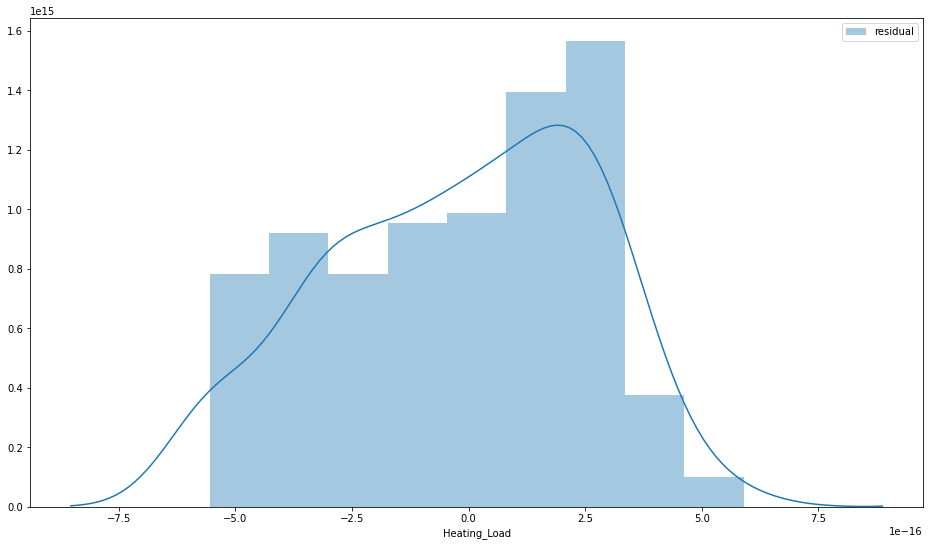

In [ ]:
 g = y_test - predicted_values
plt.figure(figsize=(16, 9))
sns.distplot(g, bins=9, label="residual")
plt.legend()